In [1]:
def check(l, r1, r2):
    r1 = int(r1*len(l))
    r2 = int(r2*len(l))
    print(l[:r1])
    print(l[r1:r1+r2])
    print(l[r1+r2:])
    print( sum( [len(l[:r1]), len(l[r1:r1+r2]), len(l[r1+r2:]) ]) )

check(list(range(20)), 0.7, 0.15)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[14, 15, 16]
[17, 18, 19]
20


In [2]:
from load_data import load_data

load_data('gripper.csv')

((      horizon                                              graph  label_0  \
  0           1  {"labels": [0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2...        8   
  1           2  {"labels": [0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2...        8   
  2           3  {"labels": [0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2...        8   
  3           4  {"labels": [0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2...        8   
  4           5  {"labels": [0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2...        8   
  ...       ...                                                ...      ...   
  1381       95  {"labels": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...       34   
  1382       96  {"labels": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...       34   
  1383       97  {"labels": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...       34   
  1384       98  {"labels": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...       34   
  1385       99  {"labels": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...       34   
  
        label_1  label_2  label_3  label_4  label

In [3]:
for i in []:
    print(i)

In [4]:
import torch

torch.cat((torch.tensor([1,2,3]), torch.tensor([0,1,2])))

/Users/jessebrouwers/.pyenv/versions/3.10.1/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([1, 2, 3, 0, 1, 2])

/var/folders/9s/tpngqg8x1k31plc16l2vvb640000gn/T/ipykernel_28836/3640742453.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


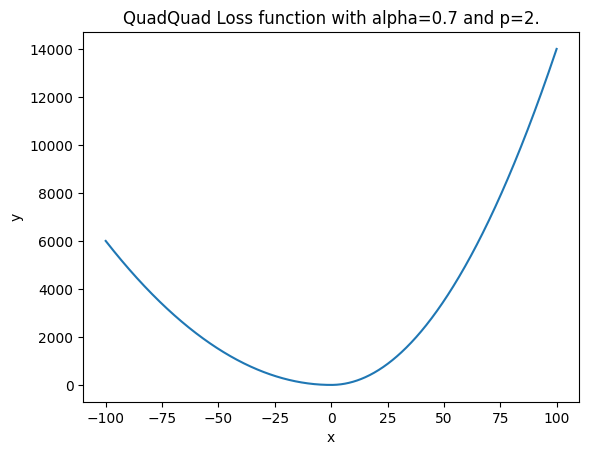

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os

def quadquad_loss(e, p=2, alpha=0.7):
    """
        Estimation_of_flood_warning_runoff_thresholds_in_u.pdf

        Assymetric loss function, penalizes underestimating more when
        alpha > 0.5, less when alpha = 0.5, and for p = 2, and alpha = 0.5
        it is mean squared error. 
    """
    return 2*(alpha + (1-2*alpha)*((e)<0)) * abs((e))**p

fig, ax = plt.subplots()
x = list(np.linspace(-100, 100, 1000))
y = list(map(quadquad_loss, x))
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('QuadQuad Loss function with alpha=0.7 and p=2.')
fig.show()
fig.savefig(os.path.join(os.getcwd(), 'QuadQuad.png'), dpi=300)



In [45]:
import torch

x = torch.tensor(torch.randn(10, 5))
q = torch.tensor(torch.tensor([0, 0, 0, 0, 1]))

def attention(q, embeddings):

    normalizer = torch.zeros(len(embeddings))
    weights = torch.zeros(len(embeddings))
    for i, row in enumerate(embeddings):
        weights[i] = torch.exp(torch.matmul(row, q))
        normalizer[i] = torch.exp(torch.matmul(row, q))
    normalizer = torch.sum(normalizer)
    weights = weights/normalizer 
    return torch.sum(torch.mul(weights.T, embeddings), axis=0)


def attention(q, embeddings):
    normalizer = torch.zeros(len(embeddings))
    weights = torch.zeros(len(embeddings))
    for i, row in enumerate(embeddings):
        weights[i] = torch.exp(torch.matmul(row, q))
        normalizer[i] = torch.exp(torch.matmul(row, q))
    normalizer = torch.sum(normalizer)
    weights = weights/normalizer 
    return torch.sum(torch.mul(weights, embeddings.T), axis=0)

def attention2(q, embeddings):
    weights = torch.exp(torch.matmul(embeddings, q))
    print(weights.shape)
    weights = weights/torch.sum(weights)
    print(torch.sum(weights))
    print(torch.mul(weights, embeddings.T).shape)
    return torch.sum(torch.mul(weights, embeddings.T), axis=1)

def self_attention(q, embeddings):
    """
        Returns the vector with the maximal sum of the self attention. 
    """
    self_att = torch.nn.MultiheadAttention(embeddings.shape[1], 1)
    out = self_att(embeddings, embeddings, embeddings)[0]
    sum = torch.sum(out, axis=0)
    _, idx = torch.max(sum, axis=0)
    return out[idx]


q = torch.randn(5)
print(attention(q, x))
print(attention2(q, x))
print(self_attention(q, x))


tensor([ 6.7112e-03,  8.8584e-02, -2.7690e-01,  9.8123e-02,  4.7257e-01,
        -4.1610e-04,  3.5294e-03, -9.5399e-03,  8.4819e-01, -7.5894e-02])
torch.Size([10])
tensor(1.0000)
torch.Size([5, 10])
tensor([ 0.8989, -0.1854,  1.1385, -0.8467,  0.1496])
tensor([[-6.4078e-02, -4.3838e-02,  3.2731e-02, -4.5397e-02, -4.0103e-02],
        [-5.2716e-02,  2.5021e-02, -3.4470e-03, -5.4065e-02, -4.0470e-02],
        [-9.0287e-02,  1.0001e-01, -3.9946e-02, -9.0428e-02, -6.5596e-02],
        [ 4.2831e-02, -8.8386e-02,  4.5775e-02,  1.0578e-02,  4.5085e-03],
        [-8.2399e-02,  1.4616e-03,  2.5535e-02, -8.3402e-02, -4.1516e-02],
        [ 1.7988e-01, -3.5925e-01,  6.7751e-02,  2.8270e-01,  2.1177e-02],
        [ 9.6233e-02, -2.0936e-01,  6.3895e-02,  1.1529e-01,  1.1411e-02],
        [ 1.1204e-04, -6.4362e-02,  3.3284e-02, -1.0090e-02, -1.8192e-02],
        [-1.2449e-01,  2.8910e-02,  1.3903e-02, -1.0769e-01, -6.1494e-02],
        [-5.2531e-02,  2.7254e-02, -8.4775e-03, -5.3793e-02, -4.5858e-02

/var/folders/9s/tpngqg8x1k31plc16l2vvb640000gn/T/ipykernel_31115/1477452342.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(torch.randn(10, 5))
/var/folders/9s/tpngqg8x1k31plc16l2vvb640000gn/T/ipykernel_31115/1477452342.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q = torch.tensor(torch.tensor([0, 0, 0, 0, 1]))
